In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# stats libraries
import statsmodels.api as sm
import scipy

%matplotlib inline

In [20]:
#loading my data using pandas
temp82_01 = pd.read_csv('data.csv')

Since I've only load a small piece of my dataset (January 1982), I will try to find the relationship between temperature and elevation. The question is: does temperature decreaess with increased elevation?

In [23]:
#using ordinal least square to run linear regression to find the relationship between temperature and elevation
temp_lm = sm.formula.ols(formula='MEAN ~ VALUE', data=temp82_01).fit()

In [24]:
#looking for the linear regression (y-intercept and slope) to construct a line equation
temp_lm.params

Intercept    15.546209
VALUE        -0.194452
dtype: float64

In [25]:
#generate a data frame using pandas to produce a list of numbers from 1 to 80
newx = pd.DataFrame({'VALUE' : range(1,80)})

In [26]:
#using the lm.predict to predict the y (temperature value) based on x (elevation)
y_preds = lm.predict(newx)

/Users/billyhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


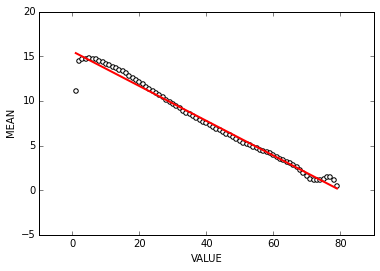

In [29]:
#generate a scatterplot on the temperature and elevation
temp82_01.plot(kind='scatter',x="VALUE", y='MEAN',c='w')
#ploting the abline 
plt.plot(newx, y_preds, color='red',linewidth=2)

In [30]:
#look for the summary for this linear model (looking for p-value and r-squared)
#we see that p-value is really low, which means the result is significant and not caused by random chances
#r-squared is extrememly high suggesting that the data fit the model very well. 
print(temp_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEAN   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4258.
Date:                Wed, 04 Nov 2015   Prob (F-statistic):           3.69e-69
Time:                        19:54:50   Log-Likelihood:                -71.251
No. Observations:                  79   AIC:                             146.5
Df Residuals:                      77   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.5462      0.137    113.303      0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bf9e4a8>]], dtype=object)

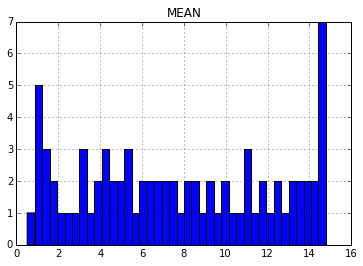

In [32]:
#to investigate the normality of the linear regression condition
#we see that it is not normally distributed, so perhaps other test would be more accurate.
temp82_01.hist(column='MEAN',bins=40)

The linear regression model shows a strong relationship between temperature and elevation: as elevation goes up, temperature goes down. We see that r-squared is 0.98, which is extremely high and suggesting that the data fit the model very well. We also see that p-value is very low, which suggest that the result is significant and not cause by random chances. Furthermore, we noticed that the normality condition is not met for linear regression, which means that using a linear regression might not be appropriate. We may need to find a non parametric test for linear regression. 

However, I think this histogram might not be a good way to examine the normality condition. I remembered it's the normality of the residuals, which we could check by using a qqplot.